In [14]:
from ultralytics import YOLO

In [15]:
# Build a YOLO model from pretrained weight
model = YOLO('/home/tang/FRA532_objectdetechtion/ObjectDetectionTask/Customtrainv11/runs/detect/train2/weights/best.pt')

In [16]:
# Display model information (optional)
model.info()

YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

In [17]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

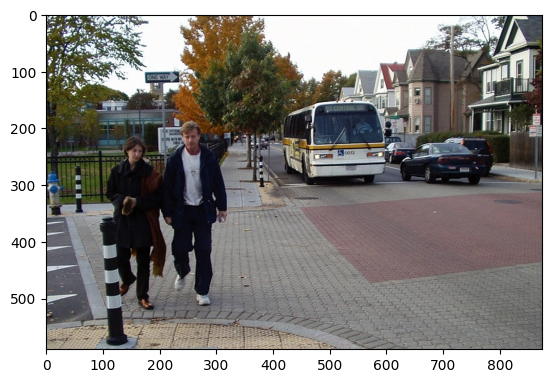

In [18]:
# Read image
im = cv2.imread('/home/tang/FRA532_objectdetechtion/ObjectDetectionTask/Customtrainv11/Testimages/Test_road.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
# show image
plt.imshow(im)
plt.show()

In [19]:
# Run inference with the YOLOv9c model
results = model(im)


0: 448x640 2 persons, 1 car, 1 bus, 57.3ms
Speed: 2.8ms preprocess, 57.3ms inference, 107.5ms postprocess per image at shape (1, 3, 448, 640)


In [20]:
# Process results list
for result in results:
    boxes = result.boxes            # Boxes object for bounding box outputs
    masks = result.masks            # Masks object for segmentation masks outputs
    names = result.names            # A dictionary of class names.
    probs = result.probs            # Probs object for classification outputs

    # Interprete Result
    image_res = result.plot()
    boxes_cls = boxes.cls.cpu().numpy()
    boxes_names = [names[cls] for cls in boxes_cls]
    boxes_conf = boxes.conf.cpu().numpy()
    boxes_xyxy = boxes.xyxy.cpu().numpy().astype('uint64')

    boxes_all = np.hstack((boxes_xyxy, boxes_conf.reshape(boxes_xyxy.shape[0], 1), boxes_cls.reshape(boxes_xyxy.shape[0], 1)))

    # Make Dataframe type
    df = pd.DataFrame(boxes_all, columns=['xmin','ymin','xmax','ymax','confidence','class'])
    df = df.astype({'xmin': 'uint64', 'ymin': 'uint64','xmax': 'uint64','ymax': 'uint64','class': 'uint64'})
    df['name'] = boxes_names

In [21]:
# Show results' data
print(df)

   xmin  ymin  xmax  ymax  confidence  class    name
0   413   148   601   301    0.930440      5     bus
1   204   189   320   514    0.912952      0  person
2   106   213   212   545    0.905321      0  person
3   624   222   791   302    0.757471      2     car


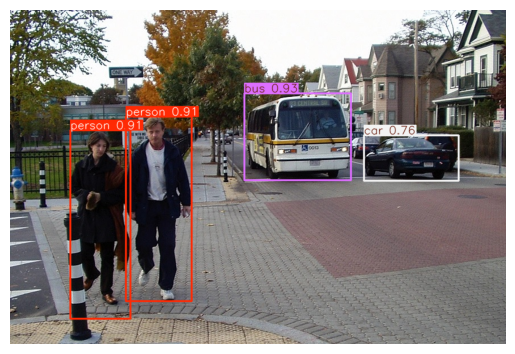

In [ ]:
# Show detected image
plt.imshow(results[0].plot())
plt.axis('off')
plt.show()